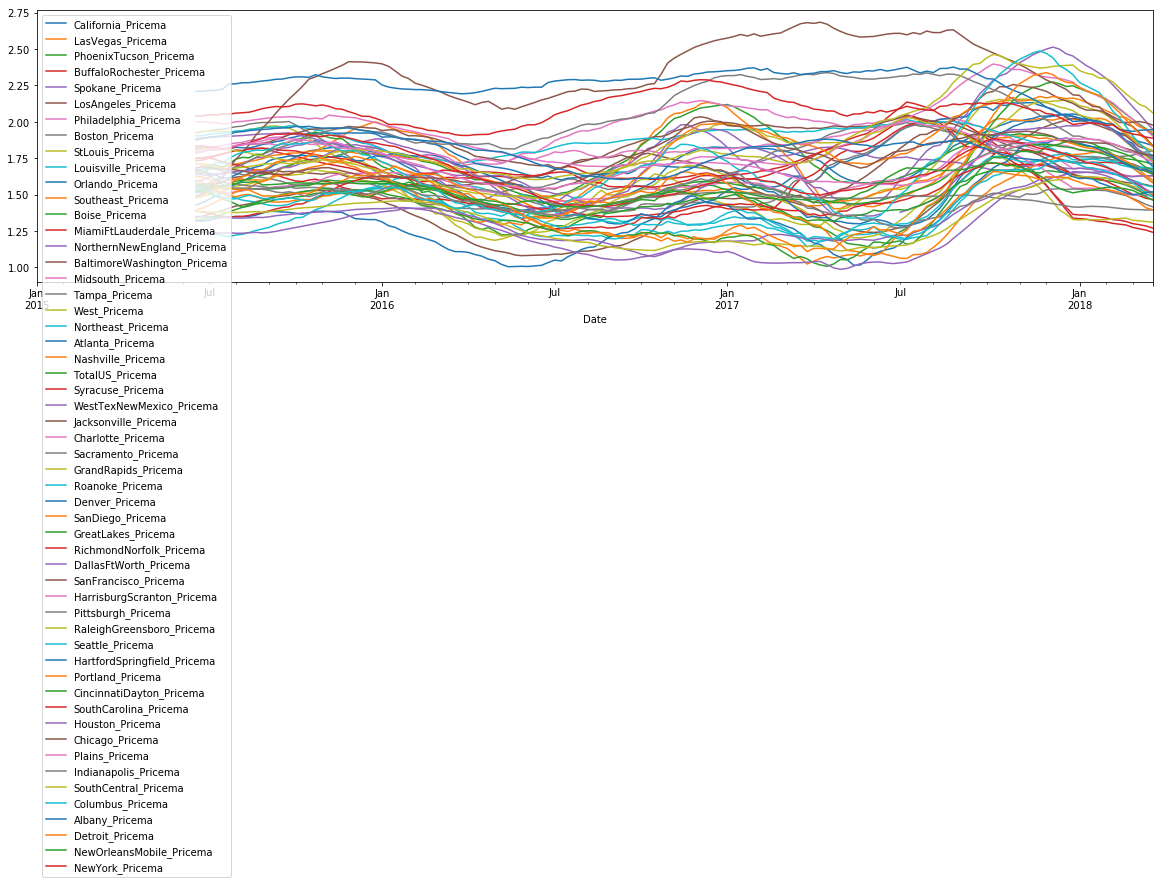

In [4]:
#download avacado dataset from kaggle community
import pandas as pd 
# import data
df = pd.read_csv("C:/Users/saima/Documents/datasets/avocado-prices/avocado.csv")
df = df.copy()[df['type'] == 'organic']#since we have duplicate dates for two types ram may crash so take any one type
df['Date'] = pd.to_datetime(df["Date"])# convert to datetime
df.sort_values(by = "Date",inplace = True)
graph_df = pd.DataFrame()
#The process below creates a dataframe in which row contains dates sorted by order and column contains region names. The values cooresponds to average prices for both row and column 
for region in df['region'].unique():
    region_df = df.copy()[df['region'] == region]
    region_df.set_index("Date",inplace = True)
    region_df.sort_index(inplace = True)
    region_df[f"{region}_Pricema"] = region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f"{region}_Pricema"]]
    else:
        graph_df = graph_df.join(region_df[f"{region}_Pricema"])

#figsize = (x,y) x = width
#                 y = height
#we may also ude matplotlib
#put legend = False if you don't want labels
graph_df.plot(figsize = (20,5), legend = True)